In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def loadDataSet(fileName, delim='\t'):
    # 导入数据集 并使用制表符分割样本属性
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in stringArr]
    return np.mat(datArr)

In [3]:
def PCA(dataMat, topNFeat=1e6):
    # topNFeat为返回属性的特征数量，若不指定则返回前1e6个
    # 计算平均值
    meanVals = np.mean(dataMat, axis=0)
    # 属性减掉均值
    meanRemoved = dataMat - meanVals
    # 计算协方差矩阵及特征值
    covMat = np.cov(meanRemoved, rowvar=0)
    eigVals, eigVects = np.linalg.eig(np.mat(covMat))
    # 将属性特征值从小到大排序
    eigValInd = np.argsort(eigVals)
    # 选择保留的特征向量索引
    eigValInd = eigValInd[:-(topNFeat + 1):-1]
    # 除去不需要的特征属性
    redEigVects = eigVects[:, eigValInd]
    # 将特征属性映射到新的空间中
    lowDDataMat = meanRemoved * redEigVects
    # 加回均值
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat, eigVals

In [4]:
def replaceNaNWithMean():
    # 将缺失数据替换为均值
    datMat = loadDataSet('./data/secom.data', ' ')
    numFeat = np.shape(datMat)[1]
    for i in range(numFeat):
        # 找到除确实数据外的其他数据 计算均值
        meanVal = np.mean(datMat[np.nonzero(~np.isnan(datMat[:, i].A))[0], i])
        # 修正NaN为均值
        datMat[np.nonzero(np.isnan(datMat[:, i].A))[0], i] = meanVal
    return datMat

In [5]:
dataMat = loadDataSet('./data/testSet.txt')
lowDData, reconMat, _ = PCA(dataMat, 1)
print(dataMat.shape, lowDData.shape)

(1000, 2) (1000, 1)


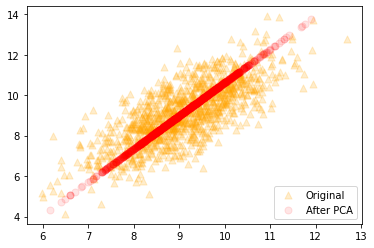

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
sc1 = ax.scatter(dataMat[:, 0].squeeze().A[0], dataMat[:, 1].squeeze().A[0],
           marker='^', s=50, c='orange', alpha=0.2)
sc2 = ax.scatter(reconMat[:, 0].squeeze().A[0], reconMat[:, 1].squeeze().A[0],
           marker='o', s=50, c='red', alpha=0.1)
plt.legend([sc1, sc2], ['Original', 'After PCA'], loc='lower right', scatterpoints=1)
plt.show()

In [7]:
secomData = replaceNaNWithMean()
nlowDData, nreconMat, _ = PCA(secomData, 6)
print(secomData.shape, nlowDData.shape)

(1567, 590) (1567, 6)


In [8]:
def plotting():
    _, reconMat, eigVals = PCA(secomData, 600)
    y1 = []
    y2 = []
    x = range(1, 21)
    for i in x:
        y1.append(eigVals[0:i].sum()/eigVals.sum())
        y2.append(eigVals[i-1]/eigVals.sum())
        print(eigVals[0:i])

    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.scatter(6, y1[5], marker='o', c='r', s=20)
    plt.text(6, y1[5]-0.1, '(6,{:.2f}%)\n'.format(y1[5]*100), c='black')
    plt.xlabel('Dimensions after PCA')
    plt.ylabel('Variance proportions')
    plt.legend(['Cumulative variance\npreserved/%',
                'Variance each PC \npreserves/%'], loc='right')
    plt.show()

[53415197.8568752]
[53415197.8568752  21746671.90465923]
[53415197.8568752  21746671.90465923  8248376.61529075]
[53415197.8568752  21746671.90465923  8248376.61529075  2073880.85929397]
[53415197.8568752  21746671.90465923  8248376.61529075  2073880.85929397
  1315404.3877583 ]
[53415197.8568752  21746671.90465923  8248376.61529075  2073880.85929397
  1315404.3877583    467693.55734419]
[53415197.8568752  21746671.90465923  8248376.61529075  2073880.85929397
  1315404.3877583    467693.55734419   290863.55541772]
[53415197.8568752  21746671.90465923  8248376.61529075  2073880.85929397
  1315404.3877583    467693.55734419   290863.55541772   283668.60065106]
[53415197.8568752  21746671.90465923  8248376.61529075  2073880.85929397
  1315404.3877583    467693.55734419   290863.55541772   283668.60065106
   237155.82977109]
[53415197.8568752  21746671.90465923  8248376.61529075  2073880.85929397
  1315404.3877583    467693.55734419   290863.55541772   283668.60065106
   237155.82977109   

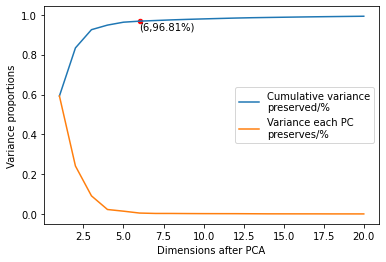

In [9]:
plotting()